# Import the data set merged in 4.9

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os

In [2]:
# Set path
path = r'C:\Users\lauri\Desktop\Careerfoundry\Python\Instacart Basket Analysis'

In [3]:
# Import data
ords_prods_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

# Security implications

In [4]:
pd.options.display.max_columns = None

In [4]:
# Check data for reminder of contents
ords_prods_customers.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_sequence,orders_day_of_week,...,first_name,surname,gender,state,age,date_joined,n_dependants,marital_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,2717275,5,prior,1,3,...,Janet,Lester,Female,California,75,10/8/2018,0,divorced/widowed,115242,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1909121,5,prior,2,0,...,Janet,Lester,Female,California,75,10/8/2018,0,divorced/widowed,115242,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,2267326,5,prior,3,3,...,Janet,Lester,Female,California,75,10/8/2018,0,divorced/widowed,115242,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,157374,5,prior,4,1,...,Janet,Lester,Female,California,75,10/8/2018,0,divorced/widowed,115242,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,2570360,8,prior,3,5,...,Anna,Allison,Female,Delaware,32,1/5/2018,1,married,88603,both


In [ ]:
#name and surname were removed because of the PII status and it was not helping for the studies. I case it would happen in a professional context I would concert with a senior data analyst to know what would be the best move.

## Create region column:

In [5]:
# First by making separate lists of states for each region:
northeast_region = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [6]:
midwest_region = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [7]:
south_region = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [8]:
west_region = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [11]:
# Create region column by assigning regions based on 'state' in each row:
ords_prods_customers.loc[ords_prods_customers['state'].isin(northeast_region), 'region'] = 'Northeast'

In [12]:
ords_prods_customers.loc[ords_prods_customers['state'].isin(midwest_region), 'region'] = 'Midwest'

In [13]:
ords_prods_customers.loc[ords_prods_customers['state'].isin(south_region), 'region'] = 'South'

In [14]:
ords_prods_customers.loc[ords_prods_customers['state'].isin(west_region), 'region'] = 'West'

In [15]:
# Check data
ords_prods_customers['region'].value_counts(dropna = False)

region
South        5480613
West         4219878
Midwest      3862126
Northeast    2908986
Name: count, dtype: int64

## Compare spending habits in different U.S. regions:

In [16]:
# Could save to clipboard and open in Excel, but it should be a small table that can be viewed here
region_spending_crosstab

spending_flag,High spender,Low spender
region,,
Midwest,29265,7566800
Northeast,18639,5703253
South,40577,10749519
West,31238,8260441


When comparing regions, the proportions of customers with different spending habits are very similar. The Midwest had the highest proportion of 'High spender' customers at 0.385%, while the Northeast had the lowest at 0.326%.

# 3 Create an exclusion flag for low-activity customers and exclude them from the data

In [17]:
# Exclude customers where max_order is less than 5 
ords_prods_customers.loc[ords_prods_customers['max_order'] < 5, 'exclusion_flag'] = 'Exclude'

In [18]:
# Keep customers where max_order is greater than or equal to 5
ords_prods_customers.loc[ords_prods_customers['max_order'] >= 5, 'exclusion_flag'] = 'Keep'

In [19]:
# Check table
ords_prods_customers.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_sequence,orders_day_of_week,...,gender,state,age,date_joined,n_dependants,marital_status,income,_merge,region,exclusion_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,2717275,5,prior,1,3,...,Female,California,75,10/8/2018,0,divorced/widowed,115242,both,West,Exclude
1,1,Chocolate Sandwich Cookies,61,19,5.8,1909121,5,prior,2,0,...,Female,California,75,10/8/2018,0,divorced/widowed,115242,both,West,Exclude
2,1,Chocolate Sandwich Cookies,61,19,5.8,2267326,5,prior,3,3,...,Female,California,75,10/8/2018,0,divorced/widowed,115242,both,West,Exclude
3,1,Chocolate Sandwich Cookies,61,19,5.8,157374,5,prior,4,1,...,Female,California,75,10/8/2018,0,divorced/widowed,115242,both,West,Exclude
4,1,Chocolate Sandwich Cookies,61,19,5.8,2570360,8,prior,3,5,...,Female,Delaware,32,1/5/2018,1,married,88603,both,South,Exclude


In [20]:
# Check frequencies
ords_prods_customers['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
Keep       15738830
Exclude      732773
Name: count, dtype: int64

In [21]:
# Check exclusion flag using crosstab
exclusion_flag_check = pd.crosstab(ords_prods_customers['exclusion_flag'], ords_prods_customers['max_order'], dropna = False)

In [22]:
exclusion_flag_check.to_clipboard()

In [23]:
# Create sample without 'exclude' rows. This can be called ords_prods_kept since it includes all the rows that were kept
ords_prods_kept = ords_prods_customers[ords_prods_customers['exclusion_flag'] == 'Keep']

In [24]:
# Check sample
ords_prods_kept.shape

(15738830, 36)

This sample includes only the relevant data

In [25]:
# Export Sample
ords_prods_kept.to_pickle(os.path.join(path, '02 Data', 'Prepared data', 'orders_products_kept_sample.pkl'))

OSError: [Errno 28] No space left on device

# Create profiling variables

Variables for age, income and number of dependents:

## Age

In [26]:
ords_prods_kept.loc[ords_prods_kept['age'] <= 25, 'age_group'] = 'Young Adult'

C:\Users\lauri\AppData\Local\Temp\ipykernel_8396\495309592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_kept.loc[ords_prods_kept['age'] <= 25, 'age_group'] = 'Young Adult'


In [27]:
ords_prods_kept.loc[(ords_prods_kept['age'] > 25) & 
                    (ords_prods_kept['age'] < 45), 'age_group'] = 'Adult'

In [28]:
ords_prods_kept.loc[(ords_prods_kept['age'] >= 45) & 
                    (ords_prods_kept['age'] < 65), 'age_group'] = 'Older adult'

In [29]:
ords_prods_kept.loc[ords_prods_kept['age'] >= 65, 'age_group'] = 'Senior'

In [30]:
# Check frequency of age_group and ensure no NaNs
ords_prods_kept['age_group'].value_counts(dropna = False)

age_group
Older adult    4930465
Adult          4679918
Senior         4168619
Young Adult    1959828
Name: count, dtype: int64

## Income

In [31]:
ords_prods_kept.loc[ords_prods_kept['income'] <= 50000, 'income_group'] = 'Low'

C:\Users\lauri\AppData\Local\Temp\ipykernel_8396\734260284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_kept.loc[ords_prods_kept['income'] <= 50000, 'income_group'] = 'Low'


In [33]:
ords_prods_kept.loc[(ords_prods_kept['income'] > 50000) & 
                    (ords_prods_kept['income'] <= 100000), 'income_group'] = 'Middle'

In [34]:
ords_prods_kept.loc[ords_prods_kept['income'] > 100000, 'income_group'] = 'High'

In [35]:
# Check frequency of income_group and ensure no NaNs
ords_prods_kept['income_group'].value_counts(dropna = False)

income_group
High      7223017
Middle    6803990
Low       1711823
Name: count, dtype: int64

## Number of Dependants

In [36]:
ords_prods_kept.loc[ords_prods_kept['n_dependants'] == 0, 'dependants_flag'] = 'No Dependants'

C:\Users\lauri\AppData\Local\Temp\ipykernel_8396\1113074742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_kept.loc[ords_prods_kept['n_dependants'] == 0, 'dependants_flag'] = 'No Dependants'


In [37]:
ords_prods_kept.loc[ords_prods_kept['n_dependants'] > 0, 'dependants_flag'] = 'Has Dependants'

In [38]:
# Check data
ords_prods_kept['dependants_flag'].value_counts(dropna = False)

dependants_flag
Has Dependants    11805383
No Dependants      3933447
Name: count, dtype: int64

# Visualisations to show distributions of profiles

Subset of unique user ids with only the relevant columns will be create

In [39]:
# Start creating unique user_id sample 
user_sample = ords_prods_kept[['user_id', 'age_group', 'income_group', 'dependants_flag', 'region', 'frequency_flag']]

In [42]:
# Remove duplicate rows in the user_sample to obtain a sample of all unique customers
user_sample = user_sample.drop_duplicates()

In [43]:
# Check data
user_sample

,user_id,age_group,income_group,dependants_flag,region,frequency_flag
5,10,Adult,Middle,Has Dependants,South,Non_frequent_customer
7,14,Senior,Middle,Has Dependants,Midwest,Non_frequent_customer
8,27,Senior,High,No Dependants,Northeast,Frequent Customer
9,37,Senior,High,Has Dependants,South,Frequent Customer
12,38,Older adult,High,No Dependants,Midwest,Non_frequent_customer
...,...,...,...,...,...,...
16377232,204400,Older adult,Middle,Has Dependants,South,Regular customer
16390776,28257,Older adult,Low,Has Dependants,West,Regular customer
16402329,53377,Older adult,Middle,Has Dependants,South,Non_frequent_customer
16406450,62511,Older adult,Low,Has Dependants,Midwest,Frequent Customer


## Age Groups

In [44]:
# Import visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [45]:
# First, create a table of age_group counts
age_group_counts = user_sample['age_group'].value_counts()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\lauri\\Desktop\\Careerfoundry\\Python\\Instacart Basket Analysis\\04 Analysis\\Visualisations\\customers_age_groups_pie.png'

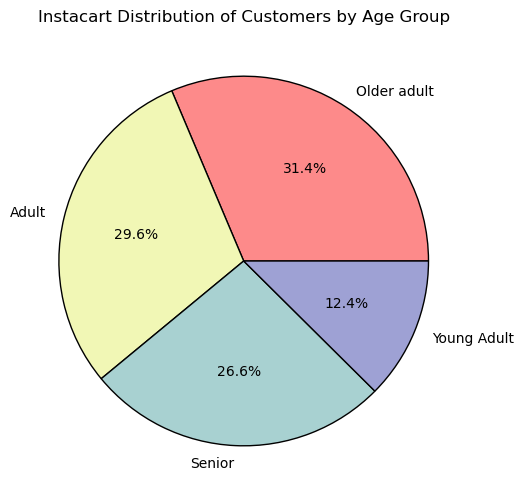

In [46]:
# Pie Chart
plt.figure(figsize=(6, 6)) # Control size of chart
plt.pie(age_group_counts, 
        labels = age_group_counts.index, 
        autopct='%.1f%%', # Show percentage to 1 d.p
        colors = ['#FD8A8A', '#F1F7B5', '#A8D1D1', '#9EA1D4'], # colour palette
        wedgeprops = {'edgecolor' : 'black'}) # boarders
plt.title('Instacart Distribution of Customers by Age Group') # title
plt.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'customers_age_groups_pie.png'), bbox_inches = 'tight') # Save
plt.show()

## Income Groups

In [47]:
# Follow same process for pie chart above
## Create a table of income_group counts
income_group_counts = user_sample['income_group'].value_counts()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\lauri\\Desktop\\Careerfoundry\\Python\\Instacart Basket Analysis\\04 Analysis\\Visualisations\\customers_income_groups_pie.png'

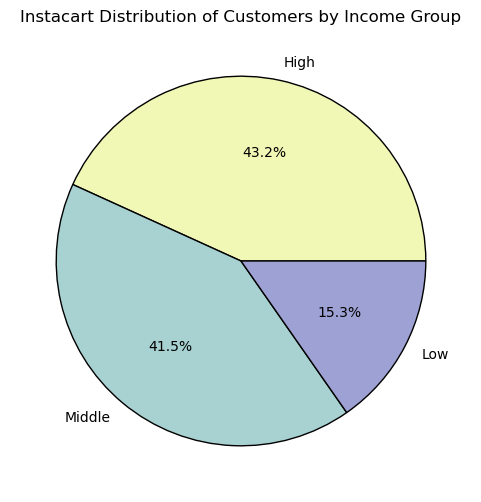

In [48]:
# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(income_group_counts, 
        labels = income_group_counts.index, 
        autopct='%.1f%%',
        colors = ['#F1F7B5', '#A8D1D1', '#9EA1D4'],
        wedgeprops = {'edgecolor' : 'black'})
plt.title('Instacart Distribution of Customers by Income Group')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'customers_income_groups_pie.png'), bbox_inches = 'tight')
plt.show()

## Customers with Dependants

In [46]:
# create a table of dependants_flag counts
dependants_flag_counts = user_sample['dependants_flag'].value_counts()

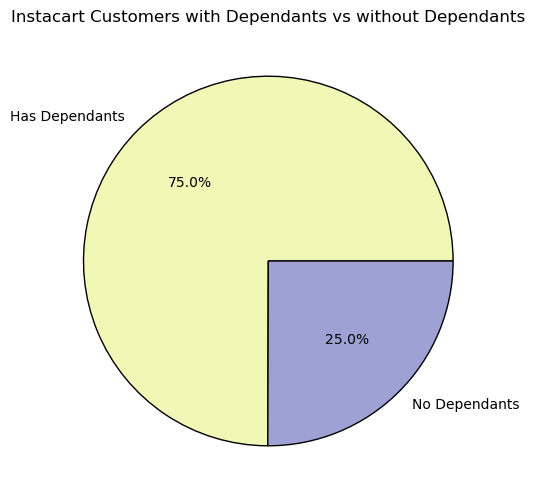

In [47]:
# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(dependants_flag_counts, 
        labels = dependants_flag_counts.index, 
        autopct='%.1f%%', 
        colors = ['#F1F7B5', '#9EA1D4'],
        wedgeprops = {'edgecolor' : 'black'})
plt.title('Instacart Customers with Dependants vs without Dependants')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'customers_dependants_pie.png'), bbox_inches = 'tight')
plt.show()

# Aggregate the max, mean, and min variables on a customer-profile

In [50]:
# Create aggregated subset of data where the 'prices' column is the total cost of each order:
orders_subset = ords_prods_kept.groupby(['user_id', 'age_group', 'income_group', 'dependants_flag', 'loyalty_flag', 'region', 'days_since_prior_order'])['prices'].sum().reset_index()

In [51]:
# Rename 'prices' to 'order_total'
orders_subset.rename(columns = {'prices' : 'order_total'}, inplace = True)

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [52]:
# Check subset
orders_subset

,user_id,age_group,income_group,dependants_flag,loyalty_flag,region,days_since_prior_order,order_total
0,1,Adult,Low,Has Dependants,New customer,South,0.0,59.0
1,1,Adult,Low,Has Dependants,New customer,South,14.0,39.3
2,1,Adult,Low,Has Dependants,New customer,South,15.0,12.9
3,1,Adult,Low,Has Dependants,New customer,South,19.0,24.9
4,1,Adult,Low,Has Dependants,New customer,South,20.0,24.9
...,...,...,...,...,...,...,...,...
1465681,99999,Adult,Middle,Has Dependants,Regular customer,Northeast,12.0,62.4
1465682,99999,Adult,Middle,Has Dependants,Regular customer,Northeast,14.0,42.3
1465683,99999,Adult,Middle,Has Dependants,Regular customer,Northeast,15.0,40.9
1465684,99999,Adult,Middle,Has Dependants,Regular customer,Northeast,21.0,10.6


## Aggregations by Age Group

In [51]:
# max, min, mean by age category
aggregations_by_age_cat = orders_subset.groupby('age_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 
                                                                  'order_total' : ['min', 'mean', 'max']})
# Check
aggregations_by_age_cat

days_since_prior_order                  order_total             \
                               min       mean   max         min       mean   
age_group                                                                    
Adult                          0.0  10.403740  30.0         1.0  79.016010   
Older adult                    0.0  10.382161  30.0         1.0  78.510544   
Senior                         0.0  10.372173  30.0         1.0  78.367220   
Young Adult                    0.0  10.380595  30.0         1.0  78.871788   

                     
                max  
age_group            
Adult         829.2  
Older adult  1092.2  
Senior        751.1  
Young Adult   842.1

Frequency: Result suggests all customers, despite their age category, will typically make an order in 10 to 11 days.

Expenditure: The average total of customers' orders are very similar across all age groups. It could be an anaomoly, but some older adults may be willing to spend a greater amount per order as indicated by the max order_total

## Aggregations by Income Group

In [52]:
# max, min, mean by age category
aggregations_by_income_cat = orders_subset.groupby('income_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'],
                                                                        'order_total' : ['min', 'mean', 'max']})
# Check
aggregations_by_income_cat

days_since_prior_order                  order_total             \
                                min       mean   max         min       mean   
income_group                                                                  
High                            0.0  10.260991  30.0         1.0  83.757004   
Low                             0.0  11.070341  30.0         1.0  52.673028   
Middle                          0.0  10.289999  30.0         1.0  81.930075   

                      
                 max  
income_group          
High          1092.2  
Low            875.0  
Middle         852.5

Frequency: There is a general tendency for customers who earn less to shop less frequently.

Expenditure: Lower income customers, perhaps unsuprisingly, spend significantly less per order than customers in the middle and high income categories. There is no significant difference between customers in the middle and high income categories.

## Aggregations by Dependants Category

In [53]:
# max, min, mean by dependants category
aggregations_by_dependants_cat = orders_subset.groupby('dependants_flag').agg({'days_since_prior_order' : ['min', 'mean', 'max'],
                                                                               'order_total' : ['min', 'mean', 'max']})
# Check
aggregations_by_dependants_cat

days_since_prior_order                  order_total  \
                                   min       mean   max         min   
dependants_flag                                                       
Has Dependants                     0.0  10.388232  30.0         1.0   
No Dependants                      0.0  10.378144  30.0         1.0   

                                    
                      mean     max  
dependants_flag                     
Has Dependants   78.728823  1092.2  
No Dependants    78.482647   875.0

No significant difference between shopping frequency or expenditure of customers with dependants and customers without dependants.

# Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

For this task, the customer profile variables will be compared across regions and department sales. However, other behaviours will be analysed in the supplementary section at the end of this script to answer key questions in the project brief. These behaviours will include the frequency/loyalty, product_prices, and order_totals.

In [54]:
# First, I'll need to get the names of each department back into the data:
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'))

In [55]:
# Check
df_dep

,department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,bulk,personal care,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [56]:
# Transpose:
df_dep_t = df_dep.T

In [57]:
# Create index
df_dep_t.reset_index(inplace = True)

In [58]:
# Copy row 0 into variable
new_header = df_dep_t.iloc[0]

In [59]:
# Remove row 0
df_dep_t = df_dep_t[1:]

In [60]:
# Assign header row
df_dep_t.columns = new_header

In [61]:
# Check code
df_dep_t

,department_id,department
1,1,frozen
2,2,other
3,3,bakery
4,4,produce
5,5,alcohol
6,6,international
7,7,beverages
8,8,pets
9,9,dry goods pasta
10,10,bulk


In [62]:
# Ensure department_id is int8 for merge with ords_prods_kept
df_dep_t['department_id'] = df_dep_t['department_id'].astype('int8')

In [63]:
# Merge on department_id
full_data = ords_prods_kept.merge(df_dep_t, on = 'department_id', indicator = True)

In [64]:
full_data.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,merge_1,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_mean_product_price,spending_flag,median_days_between_orders,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,merge_2,region,exclusion_flag,age_group,income_group,dependants_flag,department,_merge
0,14084,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,2539329,1,1,2,8,NaN,True,2,0,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep,Adult,Low,Has Dependants,dairy eggs,both
1,25133,Organic String Cheese,21,16,8.6,473747,1,3,3,12,21.0,False,4,0,both,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep,Adult,Low,Has Dependants,dairy eggs,both
2,25133,Organic String Cheese,21,16,8.6,2254736,1,4,4,7,29.0,False,4,1,both,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep,Adult,Low,Has Dependants,dairy eggs,both
3,25133,Organic String Cheese,21,16,8.6,431534,1,5,4,15,28.0,False,4,1,both,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep,Adult,Low,Has Dependants,dairy eggs,both
4,25133,Organic String Cheese,21,16,8.6,3367565,1,6,2,7,19.0,False,4,1,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep,Adult,Low,Has Dependants,dairy eggs,both


In [65]:
# Check frequency of new merge flag to ensure it is the same as the number of rows in ords_prods_kept
full_data['_merge'].value_counts(dropna = False)

_merge
both          30959687
left_only            0
right_only           0
Name: count, dtype: int64

In [66]:
# Drop merge flag
full_data.drop('_merge', axis = 1, inplace = True)

## Profile by Region

Summary of below findings: In all categories in each profiling variable, the count of customers in each category is proportionate between each region (there are no significant variations in the number of profiles that isn't simply caused by the different totals of customers in each region)

### Income Groups

C:\Users\lauri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lauri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lauri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lauri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\lauri\\Desktop\\Careerfoundry\\Python\\Instacart Basket Analysis\\04 Analysis\\Visualisations\\instacart_income_by_region.png'

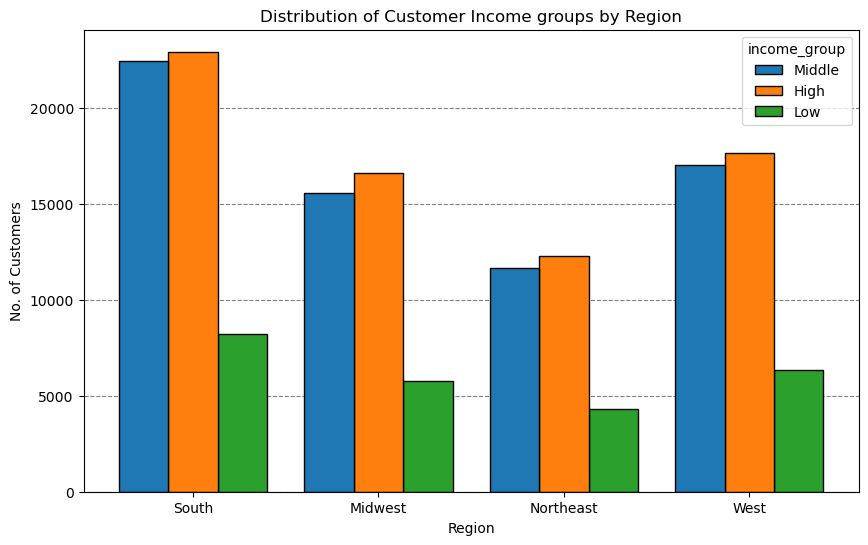

In [53]:
# A histogram could work to show the count of customers in each income group by region
plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=user_sample, x='region', hue='income_group', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customer Income groups by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'instacart_income_by_region.png'), bbox_inches = 'tight')
plt.show()

In [68]:
# Check above graph using crosstab
pd.crosstab(user_sample['income_group'], user_sample['region'], dropna = False)

region,Midwest,Northeast,South,West
income_group,,,,
High,16756,12369,23156,17799
Low,5891,4440,8403,6458
Middle,15729,11772,22634,17224


### Age Groups

C:\Users\kyles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


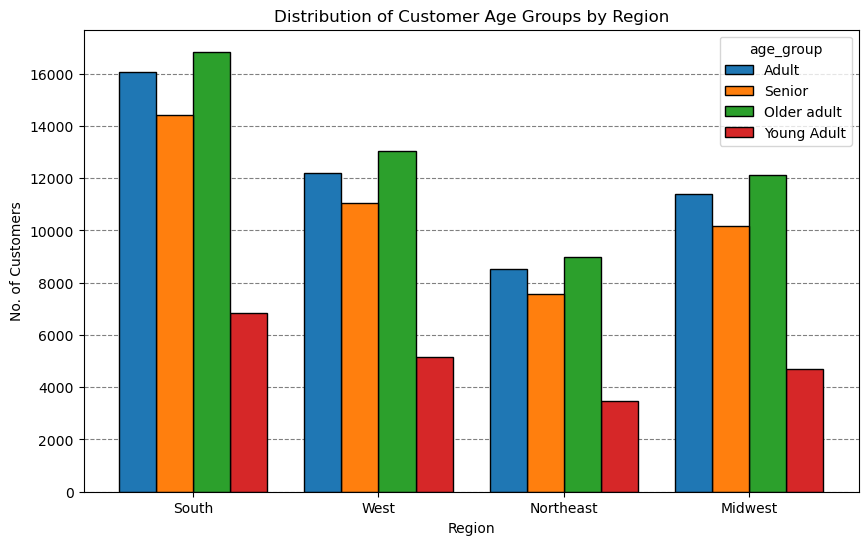

In [69]:
plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=user_sample, x='region', hue='age_group', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customer Age Groups by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'instacart_age_by_region.png'), bbox_inches = 'tight')
plt.show()

In [70]:
# Check above graph using crosstab
pd.crosstab(user_sample['age_group'], user_sample['region'], dropna = False)

region,Midwest,Northeast,South,West
age_group,,,,
Adult,11379,8527,16071,12214
Older adult,12119,9000,16839,13035
Senior,10169,7580,14433,11068
Young Adult,4709,3474,6850,5164


### Dependants

C:\Users\kyles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


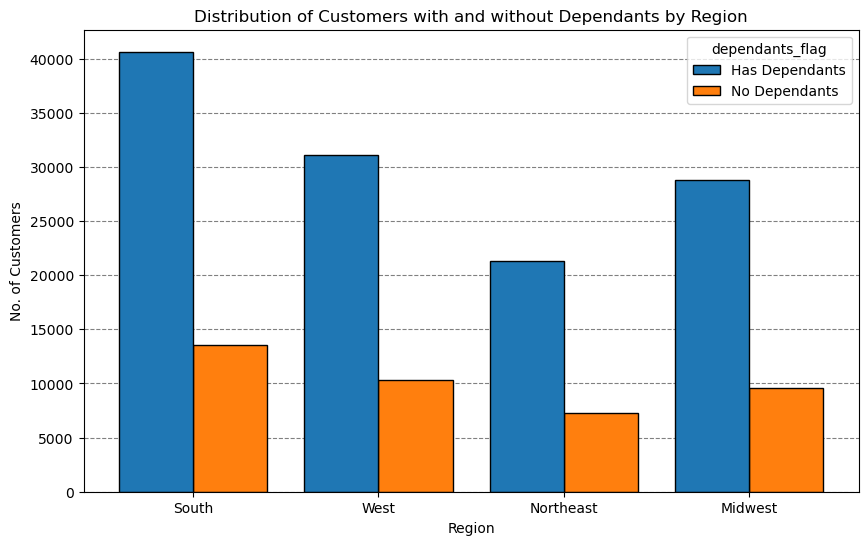

In [71]:
plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=user_sample, x='region', hue='dependants_flag', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customers with and without Dependants by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'instacart_dependants_by_region.png'), bbox_inches = 'tight')
plt.show()

In [72]:
# Check above graph using crosstab
pd.crosstab(user_sample['dependants_flag'], user_sample['region'], dropna = False)

region,Midwest,Northeast,South,West
dependants_flag,,,,
Has Dependants,28810,21326,40656,31112
No Dependants,9566,7255,13537,10369


## Profiles by Department Sales

### Income Groups

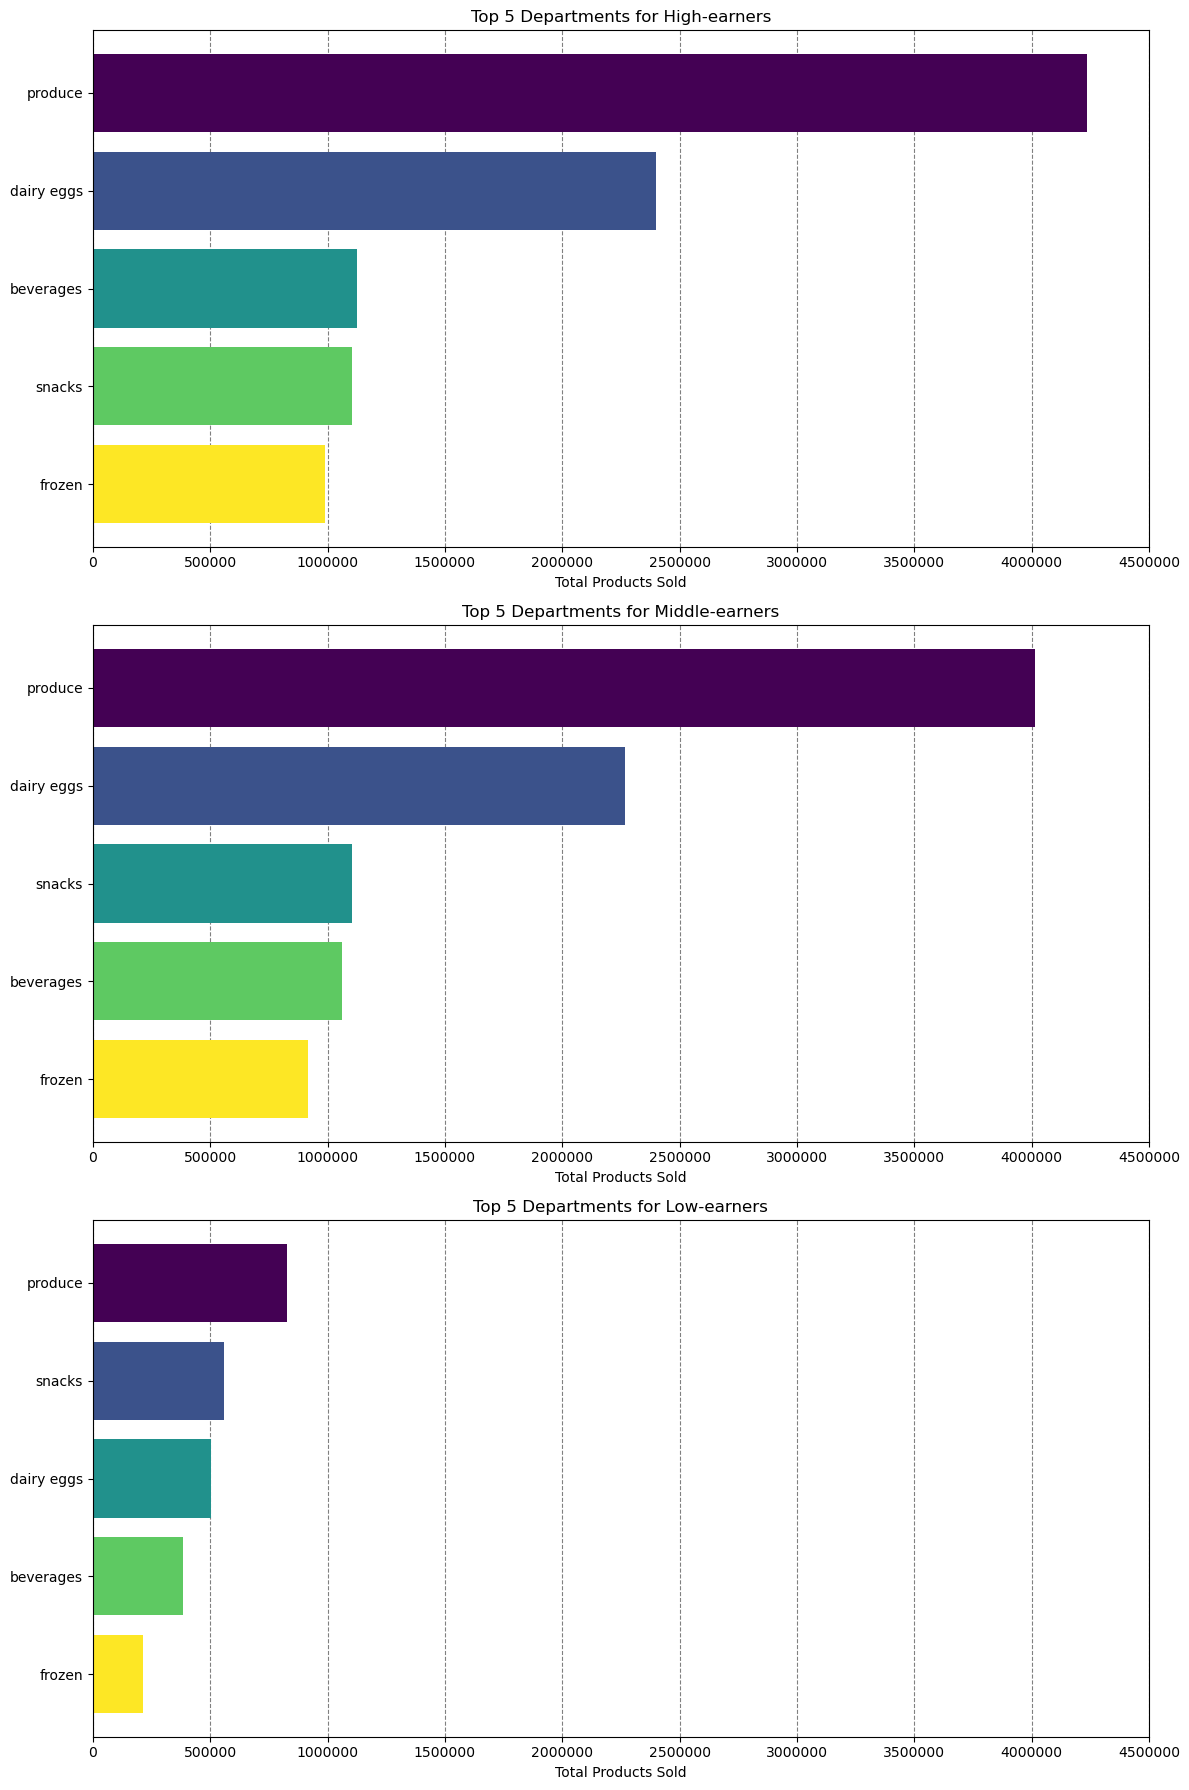

In [73]:
# Group by income_group and department, count occurrences, and sort
income_department_counts = full_data.groupby(['income_group', 'department']).size().reset_index(name='counts')
income_department_counts.sort_values(by=['income_group', 'counts'], ascending=False, inplace=True)

# Create subplots and color scheme
fig, axs = plt.subplots(3, 1, figsize=(12, 18))
colors = plt.cm.viridis(np.linspace(0, 1, 5))  # Sets colour palette

# Define the desired order of income groups
desired_order = ['High', 'Middle', 'Low']

# Iterate over each income group and create a horizontal bar chart
for i, income_group in enumerate(desired_order):
    income_data = income_department_counts[income_department_counts['income_group'] == income_group].head(5)
    ax = axs[i]
    ax.barh(income_data['department'], income_data['counts'], color=colors, zorder=2)
    ax.set_title(f'Top 5 Departments for {income_group}-earners')
    ax.set_xlabel('Total Products Sold')
    ax.set_xlim(0, 4500000) # Keep x-axis range consistent for comparisons
    ax.ticklabel_format(style='plain', axis='x')
    ax.set_ylabel('')
    ax.invert_yaxis()  # Invert y-axis to have the highest count at the top
    ax.grid(axis='x', color='gray', linestyle='dashed')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'instacart_top_departments_by_income_group.png'), bbox_inches = 'tight')
plt.show()

Note: Interesting that after "produce" the top departments differ between the income groups. Higher earners are more concerned with "dairy/eggs" whereas low-earners buy from "snacks" more often.

### Age Groups

In [54]:
# Group by age_group and department, count occurrences, and sort
age_department_counts = full_data.groupby(['age_group', 'department']).size().reset_index(name='counts')
age_department_counts.sort_values(by=['age_group', 'counts'], ascending=False, inplace=True)

# Create subplots and color scheme
fig, axs = plt.subplots(4, 1, figsize=(12, 24))
colors = plt.cm.viridis(np.linspace(0, 1, 5))  # Sets colour palette

# Define the desired order of age groups
desired_age_order = ['Senior', 'Older adult', 'Adult', 'Young Adult']

# Iterate over each age group and create a horizontal bar chart
for i, age_group in enumerate(desired_age_order):
    age_data = age_department_counts[age_department_counts['age_group'] == age_group].head(5)
    ax = axs[i]
    ax.barh(age_data['department'], age_data['counts'], color=colors, zorder=2)
    ax.set_title(f'Top 5 Departments for {age_group}s')
    ax.set_xlabel('Total Products Sold')
    ax.set_xlim(0, 3500000) # Keep x-axis range consistent for comparisons
    ax.ticklabel_format(style='plain', axis='x')
    ax.set_ylabel('')
    ax.invert_yaxis()  # Invert y-axis to have the highest count at the top
    ax.grid(axis='x', color='gray', linestyle='dashed')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'instacart_top_departments_by_age_group.png'), bbox_inches = 'tight')
plt.show()

NameError: name 'full_data' is not defined

Note: Strangely, different age groups don't show any differences between the departments they purchase the most products from. 

### Dependants

Note: Surprisingly, top departments are consistent between these groups with a roughly proportional number of products purchased in each department

# Visualisations

All visualisations have been exported throughout the script

# Export Final Data Set

In [76]:
full_data.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_full_data.pkl'))

# Supplementary Analysis

The following visualisations have been generated to answer key questions from the project brief which have either not been covered or require supporting evidence

## "Are there certain types of products that are more popular than others?"

A simple horizontal bar chart showing the overall top 10 departments for instacart would be helpful here

In [79]:
# A simple frequency count to show all departments may also provide useful insights
# Some departments may benefit from a boost in marketing
full_data['department'].value_counts(dropna=False)

department
produce            9079273
dairy eggs         5172305
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

## "Are there differences in ordering habits based on a customer's loyalty status"?

1) Analyse the average order total of customers from different loyalty groups using orders_subset from part 7

In [80]:
# Compute average order_total
loyalty_avg_order_total = orders_subset.groupby('loyalty_flag')['order_total'].mean().sort_values(ascending = False).reset_index()

In [81]:
# Check
loyalty_avg_order_total

,loyalty_flag,order_total
0,Regular customer,79.666699
1,Loyal customer,77.888122
2,New customer,77.014624


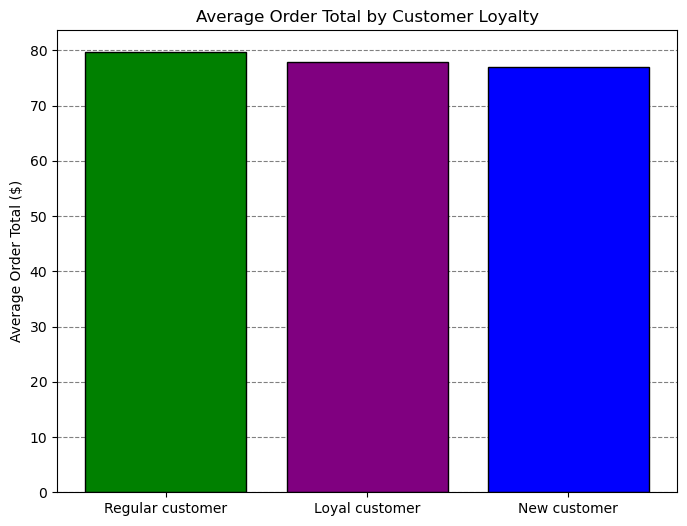

In [82]:
# Set up formatting and colours
plt.figure(figsize=(8, 6))
colors = ['green', 'purple', 'blue']

# Plot bars
bars = plt.bar(loyalty_avg_order_total['loyalty_flag'], loyalty_avg_order_total['order_total'], color=colors, edgecolor='black', zorder=2)
plt.title("Average Order Total by Customer Loyalty")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Average Order Total ($)")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'instacart_average_order_by_loyalty.png'), bbox_inches = 'tight')

2) Analyse the average product price for each loyalty grouping using full_data

In [83]:
# Compute average price of products bought
product_avg_cost = full_data.groupby('loyalty_flag')['prices'].mean().sort_values(ascending = False).reset_index()

In [84]:
# Check
product_avg_cost

,loyalty_flag,prices
0,New customer,7.801665
1,Regular customer,7.798262
2,Loyal customer,7.773575


## "Are there differences in ordering habits based on a customer's region"?

1) Total product orders:

2) Analyse average order total 

In [87]:
# Compute average order_total
region_avg_order_total = orders_subset.groupby('region')['order_total'].mean().sort_values(ascending = False).reset_index()

In [88]:
# Check
region_avg_order_total

,region,order_total
0,West,78.789436
1,Northeast,78.670088
2,South,78.627138
3,Midwest,78.588492


## "What differences can you find in ordering habits of different customer profiles"?

Since this is mostly covered by the crosstabs in section 7, I'm simply going to make a visualisation for the income groups to show the differences in order frequency and average_order_total. The age and dependants profiles won't be worth investigating further at this time since all the ordering habits are very close to being the same.

In [90]:
# Sort income groups by the mean of the order_total (keep in mind this is a multilevel index)
sorted_df = aggregations_by_income_cat.sort_values(by=('order_total', 'mean'), ascending=False)

In [91]:
# Check
sorted_df

days_since_prior_order                  order_total             \
                                min       mean   max         min       mean   
income_group                                                                  
High                            0.0  10.260991  30.0         1.0  83.757004   
Middle                          0.0  10.289999  30.0         1.0  81.930075   
Low                             0.0  11.070341  30.0         1.0  52.673028   

                      
                 max  
income_group          
High          1092.2  
Middle         852.5  
Low            875.0

In [93]:
# I would also like to look at frequency, so I'll look at the user_sample data
crosstab1 = pd.crosstab(user_sample['income_group'], user_sample['frequency_flag'], dropna=False)
# Check
crosstab1

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
income_group,,,
High,33487,15117,21476
Low,10630,6702,7860
Middle,31812,14845,20702


In [94]:
# Normalise
crosstab1_norm = crosstab1.div(crosstab1.sum(axis=1), axis = 0) * 100
# Check
crosstab1_norm

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
income_group,,,
High,47.783961,21.571062,30.644977
Low,42.195935,26.603684,31.200381
Middle,47.227542,22.038629,30.733829
